In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

In [60]:
df=pd.read_csv('hvac.csv',index_col='Date',parse_dates=True)

In [61]:
df.head()

,mass,tem,out,oc,n1,s,sw,e,n2,w,ww,floor,ceiling
Date,,,,,,,,,,,,,
01/01 01:00:00,0.011292,15.6,3.100000,0.0,14.969495,14.516262,10.667356,15.032881,15.101662,14.494765,10.692775,15.072239,14.932036
01/01 02:00:00,0.013059,15.6,-1.633333,0.0,14.845857,14.264236,9.572860,14.927319,15.003793,14.238915,9.637330,14.994772,14.838414
01/01 03:00:00,0.013986,15.6,-2.033333,0.0,14.780562,14.032646,9.437750,14.868444,14.953579,14.010805,9.503474,14.961904,14.798600
01/01 04:00:00,0.015091,15.6,-2.433333,0.0,14.736425,13.869836,9.268384,14.828190,14.917997,13.848420,9.336981,14.932588,14.763572
01/01 05:00:00,0.016359,15.6,-2.775000,0.0,14.701547,13.752946,9.132531,14.795978,14.889475,13.729092,9.209504,14.906629,14.732734


### 1. Look at the correlation of the variables

In [63]:
df_clear=df[(df['oc']!=0)&(df['mass']>0)]

In [64]:
df.columns

Index(['mass', 'tem', 'out', 'oc', 'n1', 's', 'sw', 'e', 'n2', 'w', 'ww',
       'floor', 'ceiling'],
      dtype='object')

In [65]:
cols=['tem' ,'n1', 's', 'sw', 'e',  'w', 'ww',
       'floor', 'ceiling']

In [66]:
df_walls=df_clear[cols]

In [67]:
df_walls.head()

,tem,n1,s,sw,e,w,ww,floor,ceiling
Date,,,,,,,,,
01/02 10:00:00,21.000000,19.960901,19.605104,23.062849,20.503912,20.742079,16.771438,19.166222,19.307239
01/02 11:00:00,21.000000,20.104403,20.451516,19.081749,20.566624,20.261398,17.046185,18.971916,19.417500
01/02 12:00:00,21.000000,20.041296,20.518228,17.433381,20.244332,19.787446,16.837487,18.821834,19.339921
01/02 14:00:00,21.000000,20.679584,20.510915,22.866741,20.923526,20.056847,18.086031,20.149934,19.966730
01/02 15:00:00,21.072086,21.474313,21.245253,21.926074,21.660385,20.646606,19.820302,20.275573,20.254603


array([[<AxesSubplot:xlabel='tem', ylabel='tem'>,
        <AxesSubplot:xlabel='n1', ylabel='tem'>,
        <AxesSubplot:xlabel='s', ylabel='tem'>,
        <AxesSubplot:xlabel='sw', ylabel='tem'>,
        <AxesSubplot:xlabel='e', ylabel='tem'>,
        <AxesSubplot:xlabel='w', ylabel='tem'>,
        <AxesSubplot:xlabel='ww', ylabel='tem'>,
        <AxesSubplot:xlabel='floor', ylabel='tem'>,
        <AxesSubplot:xlabel='ceiling', ylabel='tem'>],
       [<AxesSubplot:xlabel='tem', ylabel='n1'>,
        <AxesSubplot:xlabel='n1', ylabel='n1'>,
        <AxesSubplot:xlabel='s', ylabel='n1'>,
        <AxesSubplot:xlabel='sw', ylabel='n1'>,
        <AxesSubplot:xlabel='e', ylabel='n1'>,
        <AxesSubplot:xlabel='w', ylabel='n1'>,
        <AxesSubplot:xlabel='ww', ylabel='n1'>,
        <AxesSubplot:xlabel='floor', ylabel='n1'>,
        <AxesSubplot:xlabel='ceiling', ylabel='n1'>],
       [<AxesSubplot:xlabel='tem', ylabel='s'>,
        <AxesSubplot:xlabel='n1', ylabel='s'>,
        <AxesSubpl

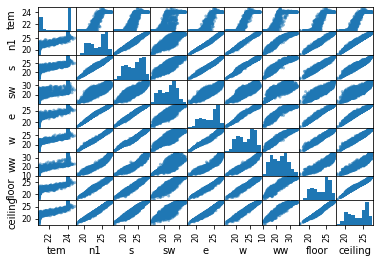

In [68]:
scatter_matrix(df_walls)

<AxesSubplot:>

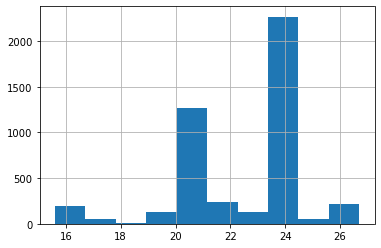

In [36]:
df_walls['tem'].hist()

<AxesSubplot:>

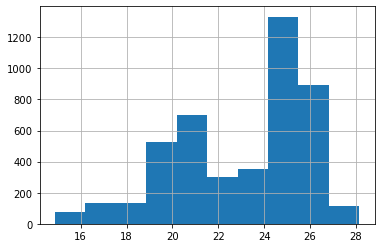

In [26]:
df_walls['floor'].hist()

In [57]:
df_clear.corr()
df_clear.plot.scatter(x='w',y='ww')

## Find the linear relationship between columns

In [22]:
import scipy.stats

In [34]:
slop=[]
inter=[]
R=[]
P=[]
for col in df_walls.columns:
    s,i,r,p,_=scipy.stats.linregress(df_walls['floor'],df_walls[col])
    slop.append(s)
    inter.append(i)
    R.append(r)
    P.append(p)

In [35]:
df_walls.columns

Index(['out', 'tem', 'n1', 's', 'sw', 'e', 'n2', 'w', 'ww', 'floor',
       'ceiling'],
      dtype='object')

In [36]:
df_walls.head()

,out,tem,n1,s,sw,e,n2,w,ww,floor,ceiling
Date,,,,,,,,,,,
01/01 01:00:00,3.100000,15.6,14.969495,14.516262,10.667356,15.032881,15.101662,14.494765,10.692775,15.072239,14.932036
01/01 02:00:00,-1.633333,15.6,14.845857,14.264236,9.572860,14.927319,15.003793,14.238915,9.637330,14.994772,14.838414
01/01 03:00:00,-2.033333,15.6,14.780562,14.032646,9.437750,14.868444,14.953579,14.010805,9.503474,14.961904,14.798600
01/01 04:00:00,-2.433333,15.6,14.736425,13.869836,9.268384,14.828190,14.917997,13.848420,9.336981,14.932588,14.763572
01/01 05:00:00,-2.775000,15.6,14.701547,13.752946,9.132531,14.795978,14.889475,13.729092,9.209504,14.906629,14.732734


In [42]:
P

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [37]:
slop

[3.627260236864492,
 0.7400413298195355,
 1.0634745724078094,
 1.2796716389917857,
 2.0104445188536872,
 1.0269098976400561,
 0.9707545427800546,
 1.2702633819882136,
 2.14513624450716,
 1.0,
 1.041054420159733]

In [38]:
inter

[-70.14255342073349,
 5.496891289624383,
 -1.320686908040745,
 -6.440125425046535,
 -24.644380325825363,
 -0.365597550705246,
 0.7901813933325386,
 -6.327249025646619,
 -28.148296094850263,
 0.0,
 -0.8531402106842982]

In [41]:
R

[0.9076722721379803,
 0.9303008005319711,
 0.9928427024648933,
 0.986482790345079,
 0.9426377088163466,
 0.9933964231623157,
 0.9953403702251147,
 0.9870135332641593,
 0.9488965966380327,
 1.0,
 0.9961253045325493]

In [13]:
interior_dif=df_walls.subtract(df_walls['floor'],axis=0)

In [14]:
interior_dif.head()

,tem,n1,s,sw,e,w,ww,floor,ceiling
Date,,,,,,,,,
01/01 01:00:00,0.527761,-0.102745,-0.555977,-4.404883,-0.039358,-0.577474,-4.379465,0.0,-0.140204
01/01 02:00:00,0.605228,-0.148915,-0.730536,-5.421912,-0.067453,-0.755857,-5.357442,0.0,-0.156358
01/01 03:00:00,0.638096,-0.181342,-0.929258,-5.524154,-0.093460,-0.951099,-5.458430,0.0,-0.163303
01/01 04:00:00,0.667412,-0.196163,-1.062752,-5.664204,-0.104398,-1.084168,-5.595607,0.0,-0.169016
01/01 05:00:00,0.693371,-0.205082,-1.153683,-5.774097,-0.110651,-1.177537,-5.697125,0.0,-0.173894


array([[<AxesSubplot:title={'center':'tem'}>,
        <AxesSubplot:title={'center':'n1'}>,
        <AxesSubplot:title={'center':'s'}>],
       [<AxesSubplot:title={'center':'sw'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'w'}>],
       [<AxesSubplot:title={'center':'ww'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'ceiling'}>]], dtype=object)

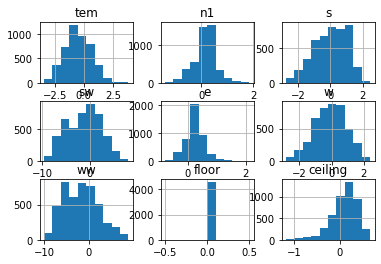

In [15]:
interior_dif.hist()

## Sampling the differences

In [ ]:
## https://campus.datacamp.com/courses/experimental-design-in-python/design-considerations-in-experimental-design?ex=5

### Step 1 Sampling the temperation combinations for heating and cooling season separately


In [ ]:
heating=

array([[<AxesSubplot:xlabel='tem', ylabel='tem'>,
        <AxesSubplot:xlabel='floor', ylabel='tem'>],
       [<AxesSubplot:xlabel='tem', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>]], dtype=object)

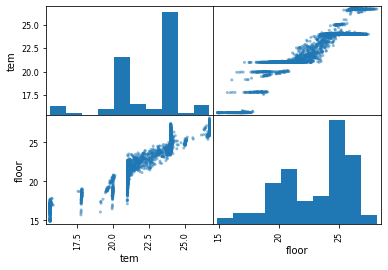

In [30]:
scatter_matrix(df_walls[['tem','floor']])

In [16]:
def sampling_diff(col,size=100):
    samples=np.random.choice(col,size=size)
    return samples
sample_diff=interior_dif.apply(lambda x: sampling_diff(x))

In [17]:
sample_diff

,tem,n1,s,sw,e,w,ww,floor,ceiling
0,-0.855131,0.456732,0.828288,-3.416012,0.351415,0.094228,-5.811956,0.0,0.250767
1,-0.684307,0.370723,0.230277,-2.823026,1.609619,-0.846964,6.696065,0.0,0.269739
2,-1.732345,0.262442,1.472038,-0.728165,0.162760,-0.779525,6.902571,0.0,0.350535
3,-1.836080,0.660648,-1.354666,3.339199,-0.189799,1.700411,-2.108007,0.0,0.201877
4,-0.343261,-0.187310,-0.355709,2.428853,0.236353,1.006197,-3.714211,0.0,-0.016773
...,...,...,...,...,...,...,...,...,...
95,0.456683,0.596712,1.284044,1.072915,0.202217,0.238451,0.812736,0.0,0.476436
96,0.493979,-0.306294,0.803953,-6.110152,0.174934,-0.384891,-4.899544,0.0,-0.379670
97,-1.731173,0.257420,-1.508844,-1.465586,0.286023,0.650407,-8.801144,0.0,0.136887
98,1.224706,0.118850,0.969805,-7.333974,0.009878,0.739022,2.171572,0.0,0.098339


### Step 2 Obtain the permutation of surface temperature and supply air

In [22]:
intv=1
interior_wall=np.arange(15,27,intv)
m_range=np.arange(0,0.4,intv/20)
tem_inx=np.arange(len(sample_diff)*len(interior_wall))


In [23]:
all_list=[tem_inx,m_range]

In [24]:
import itertools
res = list(itertools.product(*all_list))

In [25]:
len(res)

9600

### 2. Determine the temperature/mass flow range and interval

#### Temperature at mass flow @0

<AxesSubplot:>

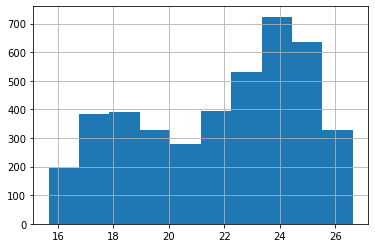

In [21]:
mass0=df.loc[df['Mass']==0,'Tem']
mass0.hist()

In [18]:
mass1_t=df.loc[df['Mass']!=0,'Tem']

<AxesSubplot:>

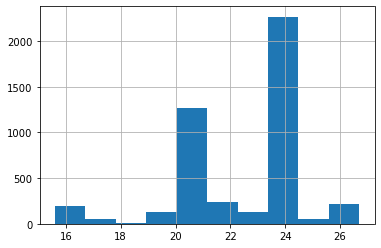

In [19]:
mass1_t.hist()

<AxesSubplot:>

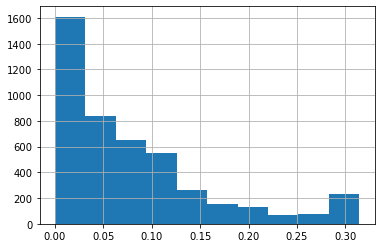

In [20]:
mass1_m=df.loc[df['Mass']!=0,'Mass']
mass1_m.hist()

### 3. Generate permutation combination of 6 parameters

In [71]:
intv=10

In [72]:
t_range=np.arange(15,27.4,intv)

In [73]:
m_range=np.arange(0,0.4,intv/30)

In [74]:
interior_wall=np.arange(15,27,intv)

In [75]:
exterior_windows=np.arange(9,35,intv)

In [76]:
exterior_walls=np.arange(13,30,intv)

In [77]:
# https://www.geeksforgeeks.org/python-all-possible-permutations-of-n-lists/
import itertools

In [94]:
all_list = [list(t_range), list(m_range), list(interior_wall),list(interior_wall),list(interior_wall),list(interior_wall),exterior_windows,exterior_windows,exterior_walls] 

In [95]:
res = list(itertools.product(*all_list))

In [83]:
df_walls

,tem,n1,s,sw,e,n2,w,ww,floor,ceiling
Date,,,,,,,,,,
01/01 01:00:00,15.60000,14.969495,14.516262,10.667356,15.032881,15.101662,14.494765,10.692775,15.072239,14.932036
01/01 02:00:00,15.60000,14.845857,14.264236,9.572860,14.927319,15.003793,14.238915,9.637330,14.994772,14.838414
01/01 03:00:00,15.60000,14.780562,14.032646,9.437750,14.868444,14.953579,14.010805,9.503474,14.961904,14.798600
01/01 04:00:00,15.60000,14.736425,13.869836,9.268384,14.828190,14.917997,13.848420,9.336981,14.932588,14.763572
01/01 05:00:00,15.60000,14.701547,13.752946,9.132531,14.795978,14.889475,13.729092,9.209504,14.906629,14.732734
...,...,...,...,...,...,...,...,...,...,...
12/31 10:00:00,15.60000,16.147595,14.641578,10.887634,16.438215,16.858946,14.630682,10.296089,16.851403,16.602854
12/31 21:00:00,15.60297,16.276156,15.415418,11.154105,16.663603,16.876878,15.292829,11.117149,16.881257,16.583474
12/31 22:00:00,15.60000,16.157759,15.190399,11.075251,16.529022,16.764695,15.103665,11.038029,16.783813,16.482705


In [84]:
df.columns

Index(['mass', 'tem', 'out', 'oc', 'n1', 's', 'sw', 'e', 'n2', 'w', 'ww',
       'floor', 'ceiling'],
      dtype='object')

In [105]:
table_cols=[ 'tem','mass','n1', 's', 'sw', 'e', 'n2', 'w', 'ww']

In [106]:
res_array=pd.DataFrame(res[:3],columns=table_cols)

In [107]:
res_array.to_csv('temperature.csv',index=False)

### 4. Seasonality

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries,  01/01  01:00:00 to  12/31  24:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mass     8760 non-null   float64
 1   tem      8760 non-null   float64
 2   out      8760 non-null   float64
 3   oc       8760 non-null   float64
 4   n1       8760 non-null   float64
 5   s        8760 non-null   float64
 6   sw       8760 non-null   float64
 7   e        8760 non-null   float64
 8   n2       8760 non-null   float64
 9   w        8760 non-null   float64
 10  ww       8760 non-null   float64
 11  floor    8760 non-null   float64
 12  ceiling  8760 non-null   float64
dtypes: float64(13)
memory usage: 958.1+ KB


In [40]:
x=np.ones((3,1))

In [41]:
x

array([[1.],
       [1.],
       [1.]])

In [44]:
y=np.random.randn(3,4)

In [45]:
y

array([[ 0.38572671,  0.21459598, -0.52690709,  0.97118098],
       [ 0.46340519, -1.1192759 , -0.05143312, -1.50103188],
       [-1.10826421,  0.22964593,  0.03112651, -0.21655543]])

In [46]:
y-x

array([[-0.61427329, -0.78540402, -1.52690709, -0.02881902],
       [-0.53659481, -2.1192759 , -1.05143312, -2.50103188],
       [-2.10826421, -0.77035407, -0.96887349, -1.21655543]])

In [58]:
np.random.randint(2,10,(3,4))

array([[9, 8, 8, 8],
       [8, 7, 9, 7],
       [4, 6, 5, 2]])

In [57]:
np.random.randint(2,10,3)

array([6, 3, 5])

In [56]:
np.random.randint(2,(3,4))

array([2, 3])